**Required libraries**


In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import os


**Checking if the dataset is balanced**

In [6]:
cat_count = len(os.listdir("D:\PrectisePython\Deep_learning\CNN\cats_vs_dogs_dataset\cat"))
dog_count = len(os.listdir("D:\PrectisePython\Deep_learning\CNN\cats_vs_dogs_dataset\dog"))
print("Cats count:", cat_count)
print("Dogs count:", dog_count)


Cats count: 10832
Dogs count: 10784


**Differentiating as train and validation data**

In [7]:
img_size = (128, 128)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cats_vs_dogs_dataset",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "cats_vs_dogs_dataset",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=img_size,
    batch_size=batch_size,
    label_mode="int"
)
class_names = train_ds.class_names
print(class_names) 
class_names = val_ds.class_names
print(class_names)


Found 21616 files belonging to 2 classes.
Using 17293 files for training.
Found 21616 files belonging to 2 classes.
Using 4323 files for validation.
['cat', 'dog']
['cat', 'dog']


**Builiding neural network**

In [8]:
model = keras.Sequential([
    layers.Rescaling(1./255, input_shape=(128, 128, 3)),
    
    layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),  # 25% dropout

    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.25),

    layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.4),

    layers.Flatten(),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


C:\Users\guruk\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compiling and fitin the model**

In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15  #incraese the epochs to have better accuracy
)



Epoch 1/15
129/541 ━━━━━━━━━━━━━━━━━━━━ 1:21 198ms/step - accuracy: 0.5117 - loss: 0.7016

KeyboardInterrupt: 

**Plotting how accuracy and loss changes of both val and train**

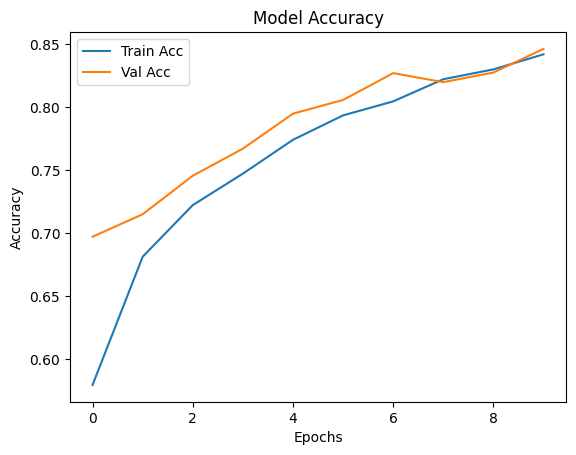

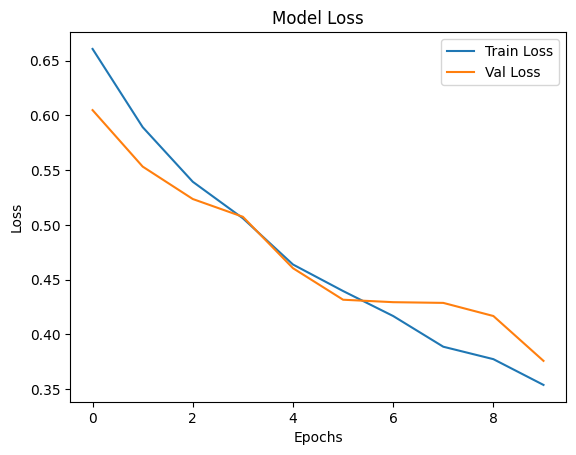

In [ ]:
# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


**Get an image from web and it will predict**

In [ ]:

while True:

    url = input("Enter the URL of the image of either cat or dog::")
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img = img.resize((128, 128))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    prediction = model.predict(img_array)
    print("prediction :" ,prediction)

    if prediction > 0.5:
       print("The given image is a dog..")
    else:
       print("The given image is a cat..")

    choice = input("If u want to check for another image enter 1::")
    if input != 1:
        break



NameError: name 'model' is not defined